**Bokeh 응용 - Interactive Visualization**

데싸랩 4기 김동욱

In [1]:
from bokeh.models import ColumnDataSource
from bokeh.layouts import widgetbox
from bokeh.plotting import figure, show, output_notebook
import numpy as np
import pandas as pd

# 표준정규분포 그리기

---

이번 시간에는 앞서 배운 내용들을 종합적으로 응용해보도록 하겠습니다.

보케의 다양한 기능들을 추가해서 정규분포를 그려보도록 할 텐데요, 우선 워밍업으로 표준정규분포를 그려봅시다!

In [2]:
## 표준정규분포
from scipy.stats import norm

# 데이터소스 설정
x = np.linspace(-5,5, num=100)
source = ColumnDataSource(data={
    "x": x,
    "y": norm.pdf(x, loc=0, scale=1)
})

# Create the plot
plot = figure(title="Normal Distribution", width=500, height=300)

# Add Scatter Glyph
plot.line(x="x", y="y", source=source, color="skyblue", line_width=3)

# Show Plot
output_notebook()
show(plot)


Loading BokehJS ...

간단하죠? 코드의 흐름은 다음과 같습니다.

1. 표준정규분포를 그리기 위해 <code>np.linespace</code>함수를 아용해 x 축의 값들을 지정한다.
2. scipy의 <code>norm</code> 함수를 이용해 x 값들에 대한 정규분포의 확률밀도(y)를 구한다.
3. <code>ColumnDataSource</code> 를 이용해 변수를 지정한다.
4. line glyph을 이용해 시각화

# 여러개의 정규분포 겹치기

---

이번에는 서로 다른 모수를 갖는 정규분포 여러개를 한꺼번에 그려봅시다. 

In [3]:
## 서로 다른 정규분포
from scipy.stats import norm

x = np.linspace(-5,5, num=100)

# 데이터소스 설정
data = ColumnDataSource(data={
    "x": x,
    "y1": norm.pdf(x, loc=0, scale=0.5),
    "y2": norm.pdf(x, loc=1, scale=1.2),
    "y3": norm.pdf(x, loc=-1, scale=0.7)
    
})


# Create the plot
plot = figure(title="Normal Distributions", width=500, height=300)

# Add Scatter Glyph
plot.line(x="x", y="y1", source=data, color="skyblue", line_width=3)
plot.line(x="x", y="y2", source=data, color="red", line_width=3, alpha=0.5)    # alpha: glyph의 투명도 지정
plot.line(x="x", y="y3", source=data, color="green", line_width=3, alpha=0.5)


# Show Plot
output_notebook()
show(plot)

Loading BokehJS ...

앞선 코드에서 단순히 <code>ColumnDataSource</code> 를 여러개 정의해서 플롯에 여러 glpyh를 추가해줬을 뿐입니다. 

여기까지는 문제 없이 따라오실 수 있을 것 같습니다!

# Legend, Hovertool 추가하기

---

위의 그림에서 우리는 한눈에 정규분포들의 모수가 서로 다른 것을 알 수 있는데요, 구체적인 값들을 알 수가 없어서 약간 답답한 느낌이 듭니다.

이번에는 범례와 앞서 배운 툴팁 중 하나인 Hovertool을 추가해서 정규분포의 값에 대한 정보들을 그래프에 포함시켜 봅시다!

정규분포를 시각화 하는 코드 자체는 앞과 동일합니다.

In [4]:
## 서로 다른 정규분포
from scipy.stats import norm
from bokeh.models import HoverTool

x = np.linspace(-5,5, num=1000)

# 정규분포 1
data1 = ColumnDataSource(data={"x": x,
                              "y": norm.pdf(x, loc=0, scale=0.5),
                              "mu": [0]*len(x),
                              "sd": [0.5]*len(x)})   # 정규분포의 모수에 대한 정보를 추가 (HoverTooltip에 사용될 것)
# 정규분포 2
data2 = ColumnDataSource(data={"x": x,
                              "y": norm.pdf(x, loc=1, scale=1.2),
                              "mu": [1]*len(x),
                              "sd": [1.2]*len(x)})
# 정규분포 3
data3 = ColumnDataSource(data={"x": x,
                              "y": norm.pdf(x, loc=-1, scale=0.7),
                              "mu": [-1]*len(x),
                              "sd": [0.7]*len(x)})


# Define Hovertools
hover_tool = HoverTool(tooltips = [
    ("x", "@x"),          
    ("y", "@y"),
    ("mu", "@mu"),
    ("sd", "@sd")
])


# Create the plot
plot = figure(title="Normal Distributions", width=500, height=300)
plot.add_tools(hover_tool) # 플롯에 hover tooltip 추가


# Add Scatter Glyph
plot.line(x="x", y="y", source=data1, color="skyblue", line_width=3,
            legend_label="N(0, 0.5)")
plot.line(x="x", y="y", source=data2, color="red", line_width=3, alpha=0.5,
            legend_label="N(1, 1.2)")
plot.line(x="x", y="y", source=data3, color="green", line_width=3, alpha=0.5,
            legend_label="N(-1, 0.7)")


# Show Plot
output_notebook()
show(plot)

Loading BokehJS ...

결과창을 보시면, 오른쪽 상단에 각 분포별 모수에 대한 정보가 범례로 추가되었고, 각 그래프에 마우스 커서를 갖다 대면 그 점에서의 x,y 값을 한 눈에 볼 수 있습니다.

# Interactive Plot

---

이제 보케의 꽃이라고 할 수 있는 사용자와 상호작용하는 그래프를 만들어 봅시다.

앞서 표준정규분포를 그렸던 코드 기억나시죠? 그 코드를 바탕으로, Slider Widget을 이용해서 사용자가 모수의 값을 변경하면 그에 따라서 그래프가 바뀌도록 설정해보겠습니다.

본격적으로 코드를 보기에 앞서, 사용자와 실시간으로 상호작용해서 출력값이 변하는 플롯, 즉 "Interactive Plot"을 그리기 위해 Bokeh가 어떻게 작동하는지를 정확히 알고 계셔야 추후에 다양하게 응용을 하실 수 있기 때문에 핵심적인 내용들을 보고 넘어가겠습니다.

---

**Q. 어떻게 하면 그래프가 사용자와 "실시간"으로 상호작용할 수 있을까?**

여기서부터의 내용은 파이썬만 사용하셨던 분들한테는 다소 생소할 수 있습니다. 최대한 핵심적인 것만 쉽게 말씀드리고 넘어가고자 하니 혹시 잘 이해가 안가시거나 추가적으로 궁금하신 부분은 저한테 연락을 주시면 같이 고민해볼 수 있을 것 같습니다.

들어가기에 앞서, "프론트엔드"의 개념을 간단하게 소개하겠습니다. 네이버에 접속하면, 우리는 정말 많은 시각적인 정보들을 볼 수 있습니다. 다양한 광고, 실시간 검색어, 오늘의 운세 등등 정말 많은 것들이 보여지죠. 이렇게 인터넷에서 사용자에게 "보여지는" 것들을 "프론트엔드"라고 합니다.

하지만 우리는 수동적으로 네이버가 보여주는 것들만 보지는 않습니다. 예를 들어 로그인을 하기 위해 로그인 창에 아이디와 비밀번호를 입력하기도 하고, 검섹어를 검색하기도 합니다. 이런 식으로 우리는 웹사이트와 "상호작용"을 하고 있는데요, 프론트엔드 개발자들은 사용자에게 보여질 정적인 (멈춰있는) 정보들을 HTML과 CSS라는 언어를 통해 정의하고, 여기에 추가적으로 **자바스크립트** 라는 언어를 통해 사용자가 웹사이트와 상호작용할 수 있도록 합니다. 여기서 중요한거는 **자바스크립트를 통해 유저와의 상호작용을 고려할 수 있다** 는 것입니다. 나머지는 다 까먹으셔도 됩니다.

결론적으로 변화하는 정보들을 실시간으로 반영해서 즉각즉각 새로운 결과를 출력해주기 위해서는 자바스크립트를 이용해야 하는데요, 이는 보케를 사용해 시각화를 할 때 역시 마찬가지입니다. 파이썬 밖에 쓸 줄 모르는 저와 같은 초보자들의 입장에서는 난처해질 수 밖에 없습니다.

하지만 다행히도, Bokeh에서는 자바스크립트로 코드를 작성할 줄 몰라도 상관없습니다 (사실 알면 더 좋긴 합니다). Bokeh가 자동적으로 변환해주기 떄문인데요, 과정을 간단하게 도식화하면 다음과 같습니다.

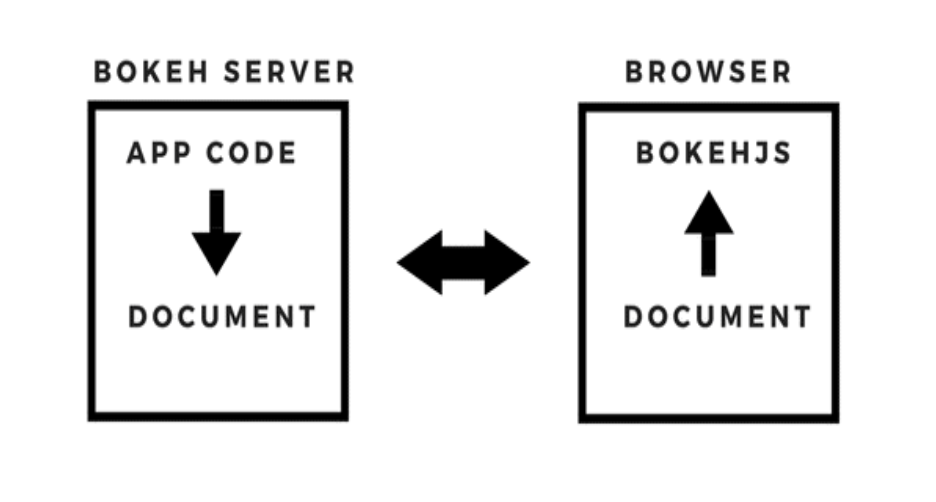

1. 우리의 노트북에서 document, 즉 파이썬 코드를 작성한다.
2. 보케는 이를 자바스크립트가 이해할 수 있는 json 파일 형식으로 변환시킨 후 보케 서버에 전송한다.
3. 보케 서버에서 사용자에 의해 실시간으로 변화하는 값을 받아서 결과값이 도출된다.
4. 도출된 결과값을 가져와서 사용하면 쥬피터 노트북에서 출력한다.

이러한 과정을 거쳐서 interactive한 plot을 만들 수 있는데요, 이제 코드를 통해 구체적으로 살펴봅시다. 아래의 코드를 실행시켜보세요.

In [5]:
from bokeh.models import Slider
from scipy.stats import norm
from bokeh.layouts import row, column
def bkapp(doc):
    
    # 초기값 설정
    initial_mu = 0
    initial_sd = 1
    x = np.linspace(-10,10, num=1000)
    
    # 칼럼 데이터 소스 정의
    source = ColumnDataSource(data={
        "x": x, 
        "y": norm.pdf(x, loc=initial_mu, scale=initial_sd)
    })
    
    
    # Create the plot
    plot = figure(title="Normal Distribution", width=500, height=300)

    # Add Scatter Glyph
    plot.line(x="x", y="y", source=source, color="skyblue", line_width=3)

    
    
    #############################################################
    ##### ---------추가될 부분------------- #####

    # Create the select widget
    slider_widget_mu = Slider(start=-5, end=5, step=0.1, value=initial_mu, title="mu")
    slider_widget_sd = Slider(start=0, end=3, step=0.01, value=initial_sd, title="sd")

    # Define the callback function
    def callback(attr, old, new):
        mu_update = slider_widget_mu.value
        sd_update = slider_widget_sd.value
        source.data = {"x": x,
                       "y": norm.pdf(x, loc=mu_update, scale=sd_update)}

    # Link slider widget and callback function
    slider_widget_mu.on_change("value", callback)
    slider_widget_sd.on_change("value", callback)
    
    # Create a layout for the application
    layout = widgetbox(slider_widget_mu, slider_widget_sd)   
    
    # Application on Jupyter notebook
    doc.add_root(row(layout, plot))
    
# 그래프 출력
show(bkapp)

코드를 실행해보시면 mu, sd에 대한 두개의 슬라이더 위젯이 생성되었고, 위젯의 값을 변경하면 그에 맞춰서 정규분포의 모양이 바뀌는 것을 확인하실 수 있을 것입니다.

전체적인 코드는 맨 처음에 표준정규분포를 그렸던 코드를 바탕으로 작성되었기 때문에, 추가된 부분만 설명해드리겠습니다.

---
**1. application function**

코드 전체가 <code>bkapp(doc):</code> 라는 함수로 추상화되어 있는 것을 보실 수 있습니다. 이는 보케 서버에서 연산된 결과물을 쥬피터 노트북에서 출력시켜주기 위함이라고 이해하시면 됩니다. 앞으로 시각화를 하시면서 아마 이 부분을 건드리실 일은 거의 없으실테니 넘어가도록 하겠습니다.

- doc.add_root: 사전에 정의한 위젯들과 플롯을 묶어서 하나의 그래프 객체로 지정한 후, document(보케 서버에 보낼 것)에 추가

---

**2. callback function**

코드의 중반부에 보시면 슬라이더 위젯을 정의한 다음에 <code>def callback(attr, old, new)</code>이라는 함수를 정의해준 것을 볼 수 있습니다. 

간단하게 말하자면, 변화하는 위젯의 값에 따라 실시간으로 데이터의 값을 변경시켜 주기 위함이라고 생각하시면 됩니다.

즉, 사용자가 위젯의 값을 변경시키면 그에 따라서 함수 callback 함수 내부에서 ColumnDataSource의 값이 재지정됩니다. 이를 바탕으로 새로운 그래프를 그리게 되는 것이죠.

명심하셔야 될 부분은, callback function을 정의하신 다음에는 꼭 <code>on_change</code> 메소드를 이용해서 위젯과 callback 함수를 연결해주셔야 데이터가 업데이트 됩니다!

# Interactive하게 정규분포 시각화하기

---

아까 전에 서로 다른 3개의 모수를 갖는 정규분포를 정의했었죠?

여기에 각 정규분포 별로 모수의 값을 사용자가 변화시킬 수 있도록 시각화를 진행해봅시다!

In [6]:
from bokeh.models import Slider
from scipy.stats import norm
from bokeh.io import curdoc
from bokeh.layouts import row
import yaml
from bokeh.themes import Theme

def bkapp(doc):
    
    # 초기값 설정
    initial_mu1 = 0
    initial_mu2 = 1
    initial_mu3 = -1
    initial_sd1 = 0.5
    initial_sd2 = 1.2
    initial_sd3 = 0.7
    x = np.linspace(-5,5, num=1000)

    # 정규분포 1
    source1 = ColumnDataSource(data={"x": x,
                                  "y": norm.pdf(x, loc=initial_mu1, scale=initial_sd1),
                                  "mu": [0]*len(x),
                                  "sd": [0.5]*len(x)})
    # 정규분포 2
    source2 = ColumnDataSource(data={"x": x,
                                  "y": norm.pdf(x, loc=initial_mu2, scale=initial_sd2),
                                  "mu": [1]*len(x),
                                  "sd": [1.2]*len(x)})
    # 정규분포 3
    source3 = ColumnDataSource(data={"x": x,
                                  "y": norm.pdf(x, loc=initial_mu3, scale=initial_sd3),
                                  "mu": [-1]*len(x),
                                  "sd": [0.7]*len(x)})

    # Define Hovertools
    hover_tool = HoverTool(tooltips = [
        ("x", "@x"),     
        ("y", "@y"),
        ("mu", "@mu"),
        ("sd", "@sd")
    ])

    # Create the plot
    plot = figure(title="Normal Distributions", width=500, height=300)
    plot.add_tools(hover_tool) # 플롯에 hover tooltip 추가

    # Add Scatter Glyph
    plot.line(x="x", y="y", legend_label="1", source=source1, color="skyblue", line_width=3)
    plot.line(x="x", y="y", legend_label="2", source=source2, color="red", line_width=3, alpha=0.5)   
    plot.line(x="x", y="y", legend_label="3", source=source3, color="green", line_width=3, alpha=0.5)
    
    # Create the select widget
    slider_widget_mu1 = Slider(start=-5, end=5, step=0.1, value=initial_mu1, title="mu1")
    slider_widget_sd1 = Slider(start=0, end=3, step=0.01, value=initial_sd1, title="sd1")
    
    slider_widget_mu2 = Slider(start=-5, end=5, step=0.1, value=initial_mu2, title="mu2")
    slider_widget_sd2 = Slider(start=0, end=3, step=0.01, value=initial_sd2, title="sd2")
    
    slider_widget_mu3 = Slider(start=-5, end=5, step=0.1, value=initial_mu3, title="mu3")
    slider_widget_sd3 = Slider(start=0, end=3, step=0.01, value=initial_sd3, title="sd3")
    
    
    # Define callback function
    def callback1(attr, old, new):
        mu = slider_widget_mu1.value
        sd = slider_widget_sd1.value
        x_new = np.linspace(-10,10, num=1000)
        source1.data = {"x": x_new,
                       "y": norm.pdf(x_new, loc=mu, scale=sd),
                      "mu": [mu]*len(x_new),
                      "sd": [sd]*len(x_new)}
    
    def callback2(attr, old, new):
        mu = slider_widget_mu2.value
        sd = slider_widget_sd2.value
        x_new = np.linspace(-10,10, num=1000)
        source2.data = {"x": x_new,
                       "y": norm.pdf(x_new, loc=mu, scale=sd),
                      "mu": [mu]*len(x_new),
                      "sd": [sd]*len(x_new)}
        
    def callback3(attr, old, new):
        mu = slider_widget_mu3.value
        sd = slider_widget_sd3.value
        x_new = np.linspace(-10,10, num=1000)
        source3.data = {"x": x_new,
                       "y": norm.pdf(x_new, loc=mu, scale=sd),
                      "mu": [mu]*len(x_new),
                      "sd": [sd]*len(x_new)}
    
    
    # Link slider widget and callback function
    slider_widget_mu1.on_change("value", callback1)
    slider_widget_sd1.on_change("value", callback1)
    
    # Link slider widget and callback function
    slider_widget_mu2.on_change("value", callback2)
    slider_widget_sd2.on_change("value", callback2)

    # Link slider widget and callback function
    slider_widget_mu3.on_change("value", callback3)
    slider_widget_sd3.on_change("value", callback3)
    
    # Create a layout for the application
    layout = widgetbox(slider_widget_mu1, slider_widget_sd1, 
                       slider_widget_mu2, slider_widget_sd2, 
                       slider_widget_mu3, slider_widget_sd3) 
    
    
    # Application on Jupyter notebook
    doc.add_root(row(layout, plot))
    
# 그래프 출력
show(bkapp)

코드가 좀 길긴 하지만, 이전의 코드를 3개의 glyph로 확장시켰을 뿐입니다. 천천히 원리를 생각하시면서 보시면 어렵지 않게 이해하실 수 있을 것이라고 생각합니다!

다음 파트에서는 보케를 이용해 지리정보를 시각화 하는 방법에 대해서 알아보도록 하겠습니다.